# Preliminary Data Analysis

In [12]:
import pandas as pd
import numpy as np


A1 = pd.read_csv("./data_mood_A1.txt", sep=",")
A2 = pd.read_csv("./data_mood_A2.txt",sep=",")
A3 = pd.read_csv("./data_mood_A3.txt",sep=",")

print(len(A1))

print(len(A2))

print(len(A3))

print(A1['filename'].nunique())# it has duplicate value in A1

print(A2['filename'].nunique())# it has duplicate value in A2

print(A3['filename'].nunique())# it has duplicate value in A3

#get the duplicate value
#print(A1[A1.duplicated(keep=False)])
#print(A2[A2.duplicated(keep=False)])
#print(A3[A3.duplicated(keep=False)])

#remove the duplicate value 
A1=A1.drop_duplicates(subset='filename',keep='first')
A2=A2.drop_duplicates(subset='filename',keep='first')
A3=A3.drop_duplicates(subset='filename',keep='first')
print('the unique A1: '+str(len(A1)))

max_len = 7054 # to be updated during the course of the project


import matplotlib.pyplot as plt

CurrentA1= A1.iloc[0:max_len]
CurrentA2= A2.iloc[0:max_len]
CurrentA3= A3.iloc[0:max_len]



#Combine the data from the 3 annotators 
dat=CurrentA1.append([CurrentA2,CurrentA3])

print(len(dat))

dat.tail()


7091
7096
7197
7054
7054
7054
the unique A1: 7054
21162


,filename,timestamp,annotator,amused,calm,content,excited,optimistic,annoyed,apathetic,frustrated,pessimistic,stressed,neutral
7192,20170831q2pernod_f000552.mp3,2018-08-22 05:38:22,A3,0,0,0,0,0,0,0,0,1,0,0
7193,20170831q2pernod_f000553.mp3,2018-08-22 05:38:30,A3,0,0,0,0,0,0,0,0,1,0,0
7194,20170831q2pernod_f000554.mp3,2018-08-22 05:38:44,A3,0,0,0,0,0,0,0,0,0,0,1
7195,20170831q2pernod_f000555.mp3,2018-08-22 05:39:07,A3,0,1,0,0,0,0,0,0,0,0,0
7196,20170831q2pernod_f000556.mp3,2018-08-22 05:39:16,A3,0,0,0,0,0,0,0,0,0,0,1


In [13]:
### group data into the new 3 labels: Positive, Neutral, Negative

positiveG=['amused','calm','excited','optimistic','content']
negativeG=['annoyed','apathetic','frustrated','pessimistic','stressed']
neutralG=['neutral']

#row sum of the components of each new label groups
dat['sumPositiveG']=dat[positiveG].sum(axis=1)
dat['sumNegativeG']=dat[negativeG].sum(axis=1)
dat['sumNeutralG']=dat[neutralG].sum(axis=1)
#dat.head(9)

#binary indicator of the new lable groups
dat['indPositiveG']=np.where(dat['sumPositiveG']!=0,1,0)
dat['indNegativeG']=np.where(dat['sumNegativeG']!=0,1,0)
dat['indNeutralG']=np.where(dat['sumNeutralG']!=0,1,0)
dat.head(9)




,filename,timestamp,annotator,amused,calm,content,excited,optimistic,annoyed,apathetic,frustrated,pessimistic,stressed,neutral,sumPositiveG,sumNegativeG,sumNeutralG,indPositiveG,indNegativeG,indNeutralG
0,20151021q3iberdrola_f000149.mp3,2018-07-25 03:00:45,A1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0
1,20151021q3iberdrola_f000150.mp3,2018-07-25 03:01:14,A1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0
2,20151021q3iberdrola_f000151.mp3,2018-07-25 03:01:37,A1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3,20151021q3iberdrola_f000152.mp3,2018-07-25 03:01:51,A1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,1
4,20151021q3iberdrola_f000153.mp3,2018-07-25 03:02:16,A1,0,1,1,0,1,0,0,0,0,0,0,3,0,0,1,0,0
5,20151021q3iberdrola_f000154.mp3,2018-07-25 03:02:37,A1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
6,20151021q3iberdrola_f000155.mp3,2018-07-25 03:02:48,A1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0
7,20151021q3iberdrola_f000156.mp3,2018-07-25 03:03:04,A1,0,0,0,1,1,0,0,0,0,0,0,2,0,0,1,0,0
8,20151021q3iberdrola_f000157.mp3,2018-07-25 03:03:38,A1,0,0,1,1,0,0,0,0,0,0,0,2,0,0,1,0,0


In [14]:
#select the target columns

dropind=list(range(3,14))

wdat=dat.drop(dat.columns[dropind],axis=1)

#print(wdat.dtypes)
print(len(wdat))

#export dataframe 
#export csv file 
wdat.to_csv('individualAnnotatorNewLabels.csv',index=True,header=True)

#wdat['filename'].nunique()# the unique value is 7054, while A1 has the length 7091




21162


In [15]:
#the counting table per filename
#wdat.groupby(['filename']).size()

#group by the file index
#wdat['totSumPositiveG']=wdat.groupby('filename')['sumPositiveG'].sum()

wdatgroupby=wdat.groupby('filename').agg({'sumPositiveG':sum,'sumNegativeG':sum,'sumNeutralG':sum})
#type(wdatgroupby)

#y=wdat[wdat['filename']=='20151021q3iberdrola_f000149.mp3']
#print(y)

#change the column names
wdatgroupby.columns=['totSumPositiveG','totSumNegativeG','totSumNeutralG']
print(wdatgroupby.head(3))

print(len(wdatgroupby))

                                 totSumPositiveG  totSumNegativeG  \
filename                                                            
20151021q3iberdrola_f000149.mp3                4                2   
20151021q3iberdrola_f000150.mp3                1                4   
20151021q3iberdrola_f000151.mp3                0                3   

                                 totSumNeutralG  
filename                                         
20151021q3iberdrola_f000149.mp3               0  
20151021q3iberdrola_f000150.mp3               0  
20151021q3iberdrola_f000151.mp3               0  
7054


In [16]:
#get the binary labels
wdatgroupbyB=wdat.groupby('filename').agg({'indPositiveG':sum,'indNegativeG':sum,'indNeutralG':sum})
wdatgroupbyB['indPositiveG']=np.where(wdatgroupbyB['indPositiveG']!=0,1,0)
wdatgroupbyB['indNegativeG']=np.where(wdatgroupbyB['indNegativeG']!=0,1,0)
wdatgroupbyB['indNeutralG']=np.where(wdatgroupbyB['indNeutralG']!=0,1,0)
wdatgroupbyB.columns=['totIndPositiveG','totIndNegativeG','totIndNeutralG']
wdatgroupbyB.head(2)


,totIndPositiveG,totIndNegativeG,totIndNeutralG
filename,,,
20151021q3iberdrola_f000149.mp3,1,1,0
20151021q3iberdrola_f000150.mp3,1,1,0


In [17]:
#combine two dataframe 
wdat1=pd.concat([wdatgroupby,wdatgroupbyB],axis=1)
#print(len(wdat1))

wdat1["class"] = [np.argmax(i) for i in wdat1.loc[:,["totSumPositiveG","totSumNegativeG","totSumNeutralG"]].get_values()]

#export csv file 
wdat1.to_csv('totGroupByNewLabels.csv',index=True,header=True)





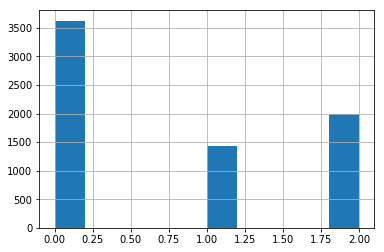

In [18]:
import matplotlib.pyplot as plt

wdat1["class"].hist()

plt.show()